# Table of Contents
 <p><div class="lev1"><a href="#Introduction-to-Pandas"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to Pandas</a></div><div class="lev2"><a href="#Pandas-Data-Structures"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pandas Data Structures</a></div><div class="lev3"><a href="#Series"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Series</a></div><div class="lev3"><a href="#DataFrame"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>DataFrame</a></div><div class="lev3"><a href="#Exercise"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Exercise</a></div><div class="lev3"><a href="#Exercise"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Exercise</a></div><div class="lev2"><a href="#Importing-data"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importing data</a></div><div class="lev3"><a href="#Microsoft-Excel"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Microsoft Excel</a></div><div class="lev2"><a href="#Pandas-Fundamentals"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Pandas Fundamentals</a></div><div class="lev3"><a href="#Manipulating-indices"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Manipulating indices</a></div><div class="lev2"><a href="#Indexing-and-Selection"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Indexing and Selection</a></div><div class="lev3"><a href="#Exercise"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Exercise</a></div><div class="lev2"><a href="#Operations"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Operations</a></div><div class="lev2"><a href="#Sorting-and-Ranking"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Sorting and Ranking</a></div><div class="lev3"><a href="#Exercise"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Exercise</a></div><div class="lev2"><a href="#Hierarchical-indexing"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Hierarchical indexing</a></div><div class="lev2"><a href="#Missing-data"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Missing data</a></div><div class="lev3"><a href="#Exercise"><span class="toc-item-num">1.8.1&nbsp;&nbsp;</span>Exercise</a></div><div class="lev2"><a href="#Data-summarization"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Data summarization</a></div><div class="lev2"><a href="#Writing-Data-to-Files"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Writing Data to Files</a></div><div class="lev3"><a href="#Advanced-Exercise:-Compiling-Ebola-Data"><span class="toc-item-num">1.10.1&nbsp;&nbsp;</span>Advanced Exercise: Compiling Ebola Data</a></div><div class="lev2"><a href="#References"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>References</a></div>

# Introduction to Pandas

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to work with *relational* or *labeled* data both. It is a fundamental high-level building block for doing practical, real world data analysis in Python. 

pandas is well suited for:

- Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
- Ordered and unordered (not necessarily fixed-frequency) time series data.
- Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
- Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure


Key features:
    
- Easy handling of **missing data**
- **Size mutability**: columns can be inserted and deleted from DataFrame and higher dimensional objects
- Automatic and explicit **data alignment**: objects can be explicitly aligned to a set of labels, or the data can be aligned automatically
- Powerful, flexible **group by functionality** to perform split-apply-combine operations on data sets
- Intelligent label-based **slicing, fancy indexing, and subsetting** of large data sets
- Intuitive **merging and joining** data sets
- Flexible **reshaping and pivoting** of data sets
- **Hierarchical labeling** of axes
- Robust **IO tools** for loading data from flat files, Excel files, databases, and HDF5
- **Time series functionality**: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

## Pandas Data Structures

### Series

A **Series** is a single vector of data (like a NumPy array) with an *index* that labels each element in the vector.

In [49]:
counts = pd.Series([632, 1638, 569, 115])
counts

0     632
1    1638
2     569
3     115
dtype: int64

If an index is not specified, a default sequence of integers is assigned as the index. A NumPy array comprises the values of the `Series`, while the index is a pandas `Index` object.

In [50]:
counts.values

array([ 632, 1638,  569,  115])

In [51]:
counts.index

RangeIndex(start=0, stop=4, step=1)

We can assign meaningful labels to the index, if they are available:

In [52]:
bacteria = pd.Series([632, 1638, 569, 115], 
    index=['Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes'])

bacteria

Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
dtype: int64

These labels can be used to refer to the values in the `Series`.

In [53]:
bacteria['Actinobacteria']

569

In [54]:
bacteria[[name.endswith('bacteria') for name in bacteria.index]]

Proteobacteria    1638
Actinobacteria     569
dtype: int64

In [55]:
[name.endswith('bacteria') for name in bacteria.index]

[False, True, True, False]

Notice that the indexing operation preserved the association between the values and the corresponding indices.

We can still use positional indexing if we wish.

In [56]:
bacteria[0]

632

We can give both the array of values and the index meaningful labels themselves:

In [57]:
bacteria.name = 'counts'
bacteria.index.name = 'phylum'
bacteria

phylum
Firmicutes         632
Proteobacteria    1638
Actinobacteria     569
Bacteroidetes      115
Name: counts, dtype: int64

NumPy's math functions and other operations can be applied to Series without losing the data structure.

In [58]:
np.log(bacteria)

phylum
Firmicutes        6.448889
Proteobacteria    7.401231
Actinobacteria    6.343880
Bacteroidetes     4.744932
Name: counts, dtype: float64

We can also filter according to the values in the `Series`:

In [59]:
bacteria[bacteria>1000]

phylum
Proteobacteria    1638
Name: counts, dtype: int64

A `Series` can be thought of as an ordered key-value store. In fact, we can create one from a `dict`:

In [60]:
bacteria_dict = {'Firmicutes': 632, 'Proteobacteria': 1638, 'Actinobacteria': 569,
                 'Bacteroidetes': 115}
pd.Series(bacteria_dict)

Actinobacteria     569
Bacteroidetes      115
Firmicutes         632
Proteobacteria    1638
dtype: int64

Notice that the `Series` is created in key-sorted order.

If we pass a custom index to `Series`, it will select the corresponding values from the dict, and treat indices without corrsponding values as missing. Pandas uses the `NaN` (not a number) type for missing values.

In [61]:
bacteria2 = pd.Series(bacteria_dict, 
                      index=['Cyanobacteria','Firmicutes',
                             'Proteobacteria','Actinobacteria'])
bacteria2

Cyanobacteria        NaN
Firmicutes         632.0
Proteobacteria    1638.0
Actinobacteria     569.0
dtype: float64

In [62]:
bacteria2.isnull()

Cyanobacteria      True
Firmicutes        False
Proteobacteria    False
Actinobacteria    False
dtype: bool

Critically, the labels are used to **align data** when used in operations with other Series objects:

In [63]:
bacteria + bacteria2

Actinobacteria    1138.0
Bacteroidetes        NaN
Cyanobacteria        NaN
Firmicutes        1264.0
Proteobacteria    3276.0
dtype: float64

Contrast this with NumPy arrays, where arrays of the same length will combine values element-wise; adding Series combined values with the same label in the resulting series. Notice also that the missing values were propogated by addition.

### DataFrame

Inevitably, we want to be able to store, view and manipulate data that is *multivariate*, where for every index there are multiple fields or columns of data, often of varying data type.

A `DataFrame` is a tabular data structure, encapsulating multiple series like columns in a spreadsheet. Data are stored internally as a 2-dimensional object, but the `DataFrame` allows us to represent and manipulate higher-dimensional data.

In [64]:
data = pd.DataFrame({'value':[632, 1638, 569, 115, 433, 1130, 754, 555],
                     'patient':[1, 1, 1, 1, 2, 2, 2, 2],
                     'phylum':['Firmicutes', 'Proteobacteria', 'Actinobacteria', 
    'Bacteroidetes', 'Firmicutes', 'Proteobacteria', 'Actinobacteria', 'Bacteroidetes']})
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


Notice the `DataFrame` is sorted by column name. We can change the order by indexing them in the order we desire:

In [65]:
data[['phylum','value','patient']]

,phylum,value,patient
0,Firmicutes,632,1
1,Proteobacteria,1638,1
2,Actinobacteria,569,1
3,Bacteroidetes,115,1
4,Firmicutes,433,2
5,Proteobacteria,1130,2
6,Actinobacteria,754,2
7,Bacteroidetes,555,2


A `DataFrame` has a second index, representing the columns:

In [66]:
data.columns

Index(['patient', 'phylum', 'value'], dtype='object')

The `dtypes` attribute reveals the data type for each column in our DataFrame. 

- `int64` is numeric integer values 
- `object` strings (letters and numbers)
- `float64` floating-point values

In [67]:
data.dtypes

patient     int64
phylum     object
value       int64
dtype: object

If we wish to access columns, we can do so either by dict-like indexing or by attribute:

In [68]:
data['patient']

0    1
1    1
2    1
3    1
4    2
5    2
6    2
7    2
Name: patient, dtype: int64

In [69]:
data.patient

0    1
1    1
2    1
3    1
4    2
5    2
6    2
7    2
Name: patient, dtype: int64

In [70]:
type(data.value)

pandas.core.series.Series

In [71]:
data[['value']]

,value
0,632
1,1638
2,569
3,115
4,433
5,1130
6,754
7,555


Notice this is different than with `Series`, where dict-like indexing retrieved a particular element (row). 

If we want access to a row in a `DataFrame`, we index its `loc` attribute.

In [72]:
data.loc[3]

patient                1
phylum     Bacteroidetes
value                115
Name: 3, dtype: object

### Exercise

Try out these commands to see what they return:

- `data.head()`
- `data.tail(3)`
- `data.shape`

In [73]:
#We will simply execute every command

print(data.head())
print(data.tail(3))
print(data.shape)



   patient          phylum  value
0        1      Firmicutes    632
1        1  Proteobacteria   1638
2        1  Actinobacteria    569
3        1   Bacteroidetes    115
4        2      Firmicutes    433
   patient          phylum  value
5        2  Proteobacteria   1130
6        2  Actinobacteria    754
7        2   Bacteroidetes    555
(8, 3)


An alternative way of initializing a `DataFrame` is with a list of dicts:

In [74]:
data = pd.DataFrame([{'patient': 1, 'phylum': 'Firmicutes', 'value': 632},
                    {'patient': 1, 'phylum': 'Proteobacteria', 'value': 1638},
                    {'patient': 1, 'phylum': 'Actinobacteria', 'value': 569},
                    {'patient': 1, 'phylum': 'Bacteroidetes', 'value': 115},
                    {'patient': 2, 'phylum': 'Firmicutes', 'value': 433},
                    {'patient': 2, 'phylum': 'Proteobacteria', 'value': 1130},
                    {'patient': 2, 'phylum': 'Actinobacteria', 'value': 754},
                    {'patient': 2, 'phylum': 'Bacteroidetes', 'value': 555}])

In [75]:
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,1130
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


Its important to note that the Series returned when a DataFrame is indexted is merely a **view** on the DataFrame, and not a copy of the data itself. So you must be cautious when manipulating this data:

In [76]:
vals = data.value
vals

0     632
1    1638
2     569
3     115
4     433
5    1130
6     754
7     555
Name: value, dtype: int64

In [77]:
vals[5] = 0
vals
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


If we plan on modifying an extracted Series, its a good idea to make a copy.

In [78]:
vals = data.value.copy()
vals[5] = 1000
vals
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,115
4,2,Firmicutes,433
5,2,Proteobacteria,0
6,2,Actinobacteria,754
7,2,Bacteroidetes,555


We can create or modify columns by assignment:

In [79]:
data.value[[3,4,6]] = [14, 21, 5]
data

,patient,phylum,value
0,1,Firmicutes,632
1,1,Proteobacteria,1638
2,1,Actinobacteria,569
3,1,Bacteroidetes,14
4,2,Firmicutes,21
5,2,Proteobacteria,0
6,2,Actinobacteria,5
7,2,Bacteroidetes,555


In [80]:
data['year'] = 2013
data

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,21,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,5,2013
7,2,Bacteroidetes,555,2013


But note, we cannot use the attribute indexing method to add a new column:

In [81]:
data.treatment = 1
data

,patient,phylum,value,year
0,1,Firmicutes,632,2013
1,1,Proteobacteria,1638,2013
2,1,Actinobacteria,569,2013
3,1,Bacteroidetes,14,2013
4,2,Firmicutes,21,2013
5,2,Proteobacteria,0,2013
6,2,Actinobacteria,5,2013
7,2,Bacteroidetes,555,2013


In [82]:
data.treatment

1

### Exercise

From the `data` table above, create an index to return all rows for which the phylum name ends in "bacteria" and the value is greater than 1000.

In [83]:
#We would like both the value to be >1K and the name to end with a specified string. We return the entries of data that match the 2.

# Write your answer here 
data[(data.value>1000) & (data.phylum.str.endswith('bacteria'))]

,patient,phylum,value,year
1,1,Proteobacteria,1638,2013


Specifying a `Series` as a new columns cause its values to be added according to the `DataFrame`'s index:

In [84]:
treatment = pd.Series([0]*4 + [1]*2)
treatment

0    0
1    0
2    0
3    0
4    1
5    1
dtype: int64

In [85]:
data['treatment'] = treatment
data

,patient,phylum,value,year,treatment
0,1,Firmicutes,632,2013,0.0
1,1,Proteobacteria,1638,2013,0.0
2,1,Actinobacteria,569,2013,0.0
3,1,Bacteroidetes,14,2013,0.0
4,2,Firmicutes,21,2013,1.0
5,2,Proteobacteria,0,2013,1.0
6,2,Actinobacteria,5,2013,NaN
7,2,Bacteroidetes,555,2013,NaN


Other Python data structures (ones without an index) need to be the same length as the `DataFrame`:

In [86]:
month = ['Jan', 'Feb', 'Mar', 'Apr']
data['month'] = month

ValueError: Length of values does not match length of index

In [87]:
data['month'] = ['Jan']*len(data)
data

,patient,phylum,value,year,treatment,month
0,1,Firmicutes,632,2013,0.0,Jan
1,1,Proteobacteria,1638,2013,0.0,Jan
2,1,Actinobacteria,569,2013,0.0,Jan
3,1,Bacteroidetes,14,2013,0.0,Jan
4,2,Firmicutes,21,2013,1.0,Jan
5,2,Proteobacteria,0,2013,1.0,Jan
6,2,Actinobacteria,5,2013,NaN,Jan
7,2,Bacteroidetes,555,2013,NaN,Jan


We can use the `drop` method to remove rows or columns, which by default drops rows. We can be explicit by using the `axis` argument:

In [88]:
data.drop(['month', axis=1])

SyntaxError: invalid syntax (<ipython-input-88-f0d94bec5029>, line 1)

We can extract the underlying data as a simple `ndarray` by accessing the `values` attribute:

In [ ]:
data.values

Notice that because of the mix of string and integer (and `NaN`) values, the dtype of the array is `object`. The dtype will automatically be chosen to be as general as needed to accomodate all the columns.

In [ ]:
df = pd.DataFrame({'foo': [1,2,3], 'bar':[0.4, -1.0, 4.5]})
df.values

Pandas uses a custom data structure to represent the indices of Series and DataFrames.

In [ ]:
data.index

Index objects are immutable:

In [ ]:
data.index[0] = 15

This is so that Index objects can be shared between data structures without fear that they will be changed.

In [ ]:
bacteria2.index = bacteria.index

In [ ]:
bacteria2

## Importing data

A key, but often under-appreciated, step in data analysis is importing the data that we wish to analyze. Though it is easy to load basic data structures into Python using built-in tools or those provided by packages like NumPy, it is non-trivial to import structured data well, and to easily convert this input into a robust data structure:

    genes = np.loadtxt("genes.csv", delimiter=",", dtype=[('gene', '|S10'), ('value', '<f4')])

Pandas provides a convenient set of functions for importing tabular data in a number of formats directly into a `DataFrame` object. These functions include a slew of options to perform type inference, indexing, parsing, iterating and cleaning automatically as data are imported.

Let's start with some more bacteria data, stored in csv format.

In [ ]:
!cat Data/microbiome.csv

This table can be read into a DataFrame using `read_csv`:

In [ ]:
mb = pd.read_csv("Data/microbiome.csv")
mb

Notice that `read_csv` automatically considered the first row in the file to be a header row.

We can override default behavior by customizing some the arguments, like `header`, `names` or `index_col`.

In [ ]:
pd.read_csv("Data/microbiome.csv", header=None).head()

`read_csv` is just a convenience function for `read_table`, since csv is such a common format:

In [ ]:
mb = pd.read_table("Data/microbiome.csv", sep=',')

The `sep` argument can be customized as needed to accomodate arbitrary separators. For example, we can use a regular expression to define a variable amount of whitespace, which is unfortunately very common in some data formats: 
    
    sep='\s+'

For a more useful index, we can specify the first two columns, which together provide a unique index to the data.

In [ ]:
mb = pd.read_csv("Data/microbiome.csv", index_col=['Patient','Taxon'])
mb.head()

This is called a *hierarchical* index, which we will revisit later in the section.

If we have sections of data that we do not wish to import (for example, known bad data), we can populate the `skiprows` argument:

In [ ]:
pd.read_csv("Data/microbiome.csv", skiprows=[3,4,6]).head()

If we only want to import a small number of rows from, say, a very large data file we can use `nrows`:

In [ ]:
pd.read_csv("Data/microbiome.csv", nrows=4)

Alternately, if we want to process our data in reasonable chunks, the `chunksize` argument will return an iterable object that can be employed in a data processing loop. For example, our microbiome data are organized by bacterial phylum, with 15 patients represented in each:

In [ ]:
pd.read_csv("Data/microbiome.csv", chunksize=15)

In [ ]:
data_chunks = pd.read_csv("Data/microbiome.csv", chunksize=15)

mean_tissue = pd.Series({chunk.Taxon[0]: chunk.Tissue.mean() for chunk in data_chunks})
    
mean_tissue

Most real-world data is incomplete, with values missing due to incomplete observation, data entry or transcription error, or other reasons. Pandas will automatically recognize and parse common missing data indicators, including `NA` and `NULL`.

In [ ]:
!cat Data/microbiome_missing.csv

In [ ]:
pd.read_csv("Data/microbiome_missing.csv").head(20)

Above, Pandas recognized `NA` and an empty field as missing data.

In [ ]:
pd.isnull(pd.read_csv("Data/microbiome_missing.csv")).head(20)

Unfortunately, there will sometimes be inconsistency with the conventions for missing data. In this example, there is a question mark "?" and a large negative number where there should have been a positive integer. We can specify additional symbols with the `na_values` argument:
   

In [ ]:
pd.read_csv("Data/microbiome_missing.csv", na_values=['?', -99999]).head(20)

These can be specified on a column-wise basis using an appropriate dict as the argument for `na_values`.

### Microsoft Excel

Since so much financial and scientific data ends up in Excel spreadsheets (regrettably), Pandas' ability to directly import Excel spreadsheets is valuable. This support is contingent on having one or two dependencies (depending on what version of Excel file is being imported) installed: `xlrd` and `openpyxl` (these may be installed with either `pip` or `easy_install`).

The read_excel convenience function in pandas imports a specific sheet from an Excel file

In [ ]:
mb = pd.read_excel('Data/microbiome/MID2.xls', sheetname='Sheet 1', header=None)
mb.head()

There are several other data formats that can be imported into Python and converted into DataFrames, with the help of buitl-in or third-party libraries. These include JSON, XML, HDF5, relational and non-relational databases, and various web APIs. These are beyond the scope of this tutorial, but are covered in [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do).

## Pandas Fundamentals

This section introduces the new user to the key functionality of Pandas that is required to use the software effectively.

For some variety, we will leave our digestive tract bacteria behind and employ some baseball data.

In [89]:
baseball = pd.read_csv("Data/baseball.csv", index_col='id')
baseball.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


Notice that we specified the `id` column as the index, since it appears to be a unique identifier. We could try to create a unique index ourselves by combining `player` and `year`:

In [90]:
player_id = baseball.player + baseball.year.astype(str)
baseball_newind = baseball.copy()
baseball_newind.index = player_id
baseball_newind.head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
womacto012006,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
schilcu012006,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
myersmi012006,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
helliri012006,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
johnsra052006,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0


This looks okay, but let's check:

In [91]:
baseball_newind.index.is_unique

False

So, indices need not be unique. Our choice is not unique because some players change teams within years.

In [92]:
pd.Series(baseball_newind.index).value_counts()

benitar012007    2
trachst012007    2
francju012007    2
gomezch022007    2
claytro012007    2
cirilje012007    2
wellsda012007    2
hernaro012007    2
coninje012007    2
loftoke012007    2
sweenma012007    2
wickmbo012007    2
sheffga012007    1
maddugr012007    1
floydcl012007    1
tavarju012007    1
zaungr012007     1
kleskry012007    1
finlest012007    1
sosasa012007     1
piazzmi012007    1
ausmubr012007    1
seleaa012007     1
suppaje012007    1
oliveda022007    1
ramirma022007    1
aloumo012007     1
seaneru012007    1
stinnke012007    1
sprinru012007    1
                ..
edmonji012007    1
helliri012006    1
finlest012006    1
delgaca012007    1
mabryjo012007    1
stantmi022007    1
martipe022007    1
greensh012007    1
seleaa012006     1
perezne012007    1
jonesto022007    1
schilcu012007    1
glavito022007    1
womacto012006    1
rodriiv012007    1
moyerja012007    1
villoro012007    1
wakefti012007    1
timlimi012007    1
alomasa022007    1
walketo042007    1
rogerke01200

The most important consequence of a non-unique index is that indexing by label will return multiple values for some labels:

In [ ]:
baseball_newind.loc['wickmbo012007']

We will learn more about indexing below.

We can create a truly unique index by combining `player`, `team` and `year`:

In [ ]:
player_unique = baseball.player + baseball.team + baseball.year.astype(str)
baseball_newind = baseball.copy()
baseball_newind.index = player_unique
baseball_newind.head()

In [ ]:
baseball_newind.index.is_unique

We can create meaningful indices more easily using a hierarchical index; for now, we will stick with the numeric `id` field as our index.

### Manipulating indices

**Reindexing** allows users to manipulate the data labels in a DataFrame. It forces a DataFrame to conform to the new index, and optionally, fill in missing data if requested.

A simple use of `reindex` is to alter the order of the rows:

In [93]:
baseball.reindex(baseball.index[::-1]).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
89534,alomasa02,2007,1,NYN,NL,8,22,1,3,1,...,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0
89533,aloumo01,2007,1,NYN,NL,87,328,51,112,19,...,49.0,3.0,0.0,27,30.0,5.0,2.0,0.0,3.0,13.0
89530,ausmubr01,2007,1,HOU,NL,117,349,38,82,16,...,25.0,6.0,1.0,37,74.0,3.0,6.0,4.0,1.0,11.0
89526,benitar01,2007,1,SFN,NL,19,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
89525,benitar01,2007,2,FLO,NL,34,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0


Notice that the `id` index is not sequential. Say we wanted to populate the table with every `id` value. We could specify and index that is a sequence from the first to the last `id` numbers in the database, and Pandas would fill in the missing data with `NaN` values:

In [94]:
id_range = range(baseball.index.values.min(), baseball.index.values.max())
baseball.reindex(id_range).head()

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006.0,2.0,CHN,NL,19.0,50.0,6.0,14.0,1.0,...,2.0,1.0,1.0,4.0,4.0,0.0,0.0,3.0,0.0,0.0
88642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88643,schilcu01,2006.0,1.0,BOS,AL,31.0,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
88644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88645,myersmi01,2006.0,1.0,NYA,AL,62.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Missing values can be filled as desired, either with selected values, or by rule:

In [95]:
baseball.reindex(id_range, method='ffill', columns=['player','year']).head()

,player,year
id,,
88641,womacto01,2006
88642,womacto01,2006
88643,schilcu01,2006
88644,schilcu01,2006
88645,myersmi01,2006


In [96]:
baseball.reindex(id_range, fill_value='charliebrown', columns=['player']).head()

,player
id,
88641,womacto01
88642,charliebrown
88643,schilcu01
88644,charliebrown
88645,myersmi01


Keep in mind that `reindex` does not work if we pass a non-unique index series.

We can remove rows or columns via the `drop` method:

In [ ]:
baseball.shape

In [97]:
baseball.drop([89525, 89526])

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,...,2.0,1.0,1.0,4,4.0,0.0,0.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,...,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0
88652,finlest01,2006,1,SFN,NL,139,426,66,105,21,...,40.0,7.0,0.0,46,55.0,2.0,2.0,3.0,4.0,6.0
88653,gonzalu01,2006,1,ARI,NL,153,586,93,159,52,...,73.0,0.0,1.0,69,58.0,10.0,7.0,0.0,6.0,14.0
88662,seleaa01,2006,1,LAN,NL,28,26,2,5,1,...,0.0,0.0,0.0,1,7.0,0.0,0.0,6.0,0.0,1.0
89177,francju01,2007,2,ATL,NL,15,40,1,10,3,...,8.0,0.0,0.0,4,10.0,1.0,0.0,0.0,1.0,1.0


In [98]:
baseball.drop(['ibb','hbp'], axis=1)

,player,year,stint,team,lg,g,ab,r,h,X2b,X3b,hr,rbi,sb,cs,bb,so,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,
88641,womacto01,2006,2,CHN,NL,19,50,6,14,1,0,1,2.0,1.0,1.0,4,4.0,3.0,0.0,0.0
88643,schilcu01,2006,1,BOS,AL,31,2,0,1,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0
88645,myersmi01,2006,1,NYA,AL,62,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
88649,helliri01,2006,1,MIL,NL,20,3,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0
88650,johnsra05,2006,1,NYA,AL,33,6,0,1,0,0,0,0.0,0.0,0.0,0,4.0,0.0,0.0,0.0
88652,finlest01,2006,1,SFN,NL,139,426,66,105,21,12,6,40.0,7.0,0.0,46,55.0,3.0,4.0,6.0
88653,gonzalu01,2006,1,ARI,NL,153,586,93,159,52,2,15,73.0,0.0,1.0,69,58.0,0.0,6.0,14.0
88662,seleaa01,2006,1,LAN,NL,28,26,2,5,1,0,0,0.0,0.0,0.0,1,7.0,6.0,0.0,1.0
89177,francju01,2007,2,ATL,NL,15,40,1,10,3,0,0,8.0,0.0,0.0,4,10.0,0.0,1.0,1.0


## Indexing and Selection

Indexing works analogously to indexing in NumPy arrays, except we can use the labels in the `Index` object to extract values in addition to arrays of integers.

In [ ]:
# Sample Series object
hits = baseball_newind.h
hits

In [ ]:
# Numpy-style indexing
hits[:3]

In [ ]:
# Indexing by label
hits[['womacto01CHN2006','schilcu01BOS2006']]

We can also slice with data labels, since they have an intrinsic order within the Index:

In [ ]:
hits['womacto01CHN2006':'gonzalu01ARI2006']

In [ ]:
hits['womacto01CHN2006':'gonzalu01ARI2006'] = 5
hits

In a `DataFrame` we can slice along either or both axes:

In [ ]:
baseball_newind[['h','ab']]

In [ ]:
baseball_newind[baseball_newind.ab>500]

For a more concise (and readable) syntax, we can use the new `query` method to perform selection on a `DataFrame`. Instead of having to type the fully-specified column, we can simply pass a string that describes what to select. The query above is then simply:

In [ ]:
baseball_newind.query('ab > 500')

The `DataFrame.index` and `DataFrame.columns` are placed in the query namespace by default. If you want to refer to a variable in the current namespace, you can prefix the variable with `@`:

In [ ]:
min_ab = 500

In [ ]:
baseball_newind.query('ab > @min_ab')

The indexing field `loc` allows us to select subsets of rows and columns in an intuitive way:

In [ ]:
baseball_newind.loc['gonzalu01ARI2006', ['h','X2b', 'X3b', 'hr']]

In [ ]:
baseball_newind.loc[:'myersmi01NYA2006', 'hr']

In addition to using `loc` to select rows and columns by **label**, pandas also allows indexing by **position** using the `iloc` attribute.

So, we can query rows and columns by absolute position, rather than by name:

In [ ]:
baseball_newind.iloc[:5, 5:8]

### Exercise

You can use the `isin` method query a DataFrame based upon a list of values as follows: 

    data['phylum'].isin(['Firmacutes', 'Bacteroidetes'])

Use `isin` to find all players that played for the Los Angeles Dodgers (LAN) or the San Francisco Giants (SFN). How many records contain these values?

In [101]:
#We use the isin function as was asked to return baseball's entries that match with desired statement

# Write your answer here
baseball[baseball['team'].isin(['LAN', 'SFN'])]

,player,year,stint,team,lg,g,ab,r,h,X2b,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,gidp
id,,,,,,,,,,,,,,,,,,,,,
88652,finlest01,2006,1,SFN,NL,139,426,66,105,21,...,40.0,7.0,0.0,46,55.0,2.0,2.0,3.0,4.0,6.0
88662,seleaa01,2006,1,LAN,NL,28,26,2,5,1,...,0.0,0.0,0.0,1,7.0,0.0,0.0,6.0,0.0,1.0
89339,wellsda01,2007,2,LAN,NL,7,15,2,4,1,...,1.0,0.0,0.0,0,6.0,0.0,0.0,0.0,0.0,0.0
89347,vizquom01,2007,1,SFN,NL,145,513,54,126,18,...,51.0,14.0,6.0,44,48.0,6.0,1.0,14.0,3.0,14.0
89365,sweenma01,2007,2,LAN,NL,30,33,2,9,1,...,3.0,0.0,0.0,1,11.0,0.0,0.0,0.0,0.0,0.0
89366,sweenma01,2007,1,SFN,NL,76,90,18,23,8,...,10.0,2.0,0.0,13,18.0,0.0,3.0,1.0,0.0,0.0
89382,seaneru01,2007,1,LAN,NL,68,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
89383,schmija01,2007,1,LAN,NL,6,7,1,1,0,...,1.0,0.0,0.0,0,4.0,0.0,0.0,1.0,0.0,0.0
89431,loaizes01,2007,1,LAN,NL,5,7,0,1,0,...,2.0,0.0,0.0,0,2.0,0.0,0.0,2.0,0.0,1.0


## Operations

`DataFrame` and `Series` objects allow for several operations to take place either on a single object, or between two or more objects.

For example, we can perform arithmetic on the elements of two objects, such as combining baseball statistics across years. First, let's (artificially) construct two Series, consisting of home runs hit in years 2006 and 2007, respectively:

In [ ]:
hr2006 = baseball.loc[baseball.year==2006, 'hr']
hr2006.index = baseball.player[baseball.year==2006]

hr2007 = baseball.loc[baseball.year==2007, 'hr']
hr2007.index = baseball.player[baseball.year==2007]

In [ ]:
hr2007

Now, let's add them together, in hopes of getting 2-year home run totals:

In [ ]:
hr_total = hr2006 + hr2007
hr_total

Pandas' data alignment places `NaN` values for labels that do not overlap in the two Series. In fact, there are only 6 players that occur in both years.

In [ ]:
hr_total[hr_total.notnull()]


While we do want the operation to honor the data labels in this way, we probably do not want the missing values to be filled with `NaN`. We can use the `add` method to calculate player home run totals by using the `fill_value` argument to insert a zero for home runs where labels do not overlap:

In [ ]:
hr2007.add(hr2006, fill_value=0)

Operations can also be **broadcast** between rows or columns.

For example, if we subtract the maximum number of home runs hit from the `hr` column, we get how many fewer than the maximum were hit by each player:

In [ ]:
baseball.hr - baseball.hr.max()

Or, looking at things row-wise, we can see how a particular player compares with the rest of the group with respect to important statistics

In [ ]:
baseball.loc[89521, "player"]

In [ ]:
stats = baseball[['h','X2b', 'X3b', 'hr']]
diff = stats - stats.loc[89521]
diff[:10]

We can also apply functions to each column or row of a `DataFrame`

In [ ]:
stats.apply(np.median)

In [ ]:
def range_calc(x):
    return x.max() - x.min()

In [ ]:
stat_range = lambda x: x.max() - x.min()
stats.apply(stat_range)

Lets use apply to calculate a meaningful baseball statistics, [slugging percentage](https://en.wikipedia.org/wiki/Slugging_percentage):

$$SLG = \frac{1B + (2 \times 2B) + (3 \times 3B) + (4 \times HR)}{AB}$$

And just for fun, we will format the resulting estimate.

In [ ]:
def slugging(x): 
    bases = x['h']-x['X2b']-x['X3b']-x['hr'] + 2*x['X2b'] + 3*x['X3b'] + 4*x['hr']
    ab = x['ab']+1e-6
    
    return bases/ab

baseball.apply(slugging, axis=1).round(3)

## Sorting and Ranking

Pandas objects include methods for re-ordering data.

In [ ]:
baseball_newind.sort_index().head()

In [ ]:
baseball_newind.sort_index(ascending=False).head()

Try sorting the **columns** instead of the rows, in ascending order:

In [ ]:
baseball_newind.sort_index(axis=1).head()

We can also use `sort_values` to sort a `Series` by value, rather than by label.

In [ ]:
baseball.hr.sort_values()

For a `DataFrame`, we can sort according to the values of one or more columns using the `by` argument of `sort_values`:

In [ ]:
baseball[['player','sb','cs']].sort_values(ascending=[False,True], 
                                           by=['sb', 'cs']).head(10)

**Ranking** does not re-arrange data, but instead returns an index that ranks each value relative to others in the Series.

In [ ]:
baseball.hr.rank()

Ties are assigned the mean value of the tied ranks, which may result in decimal values.

In [ ]:
pd.Series([100,100]).rank()

Alternatively, you can break ties via one of several methods, such as by the order in which they occur in the dataset:

In [ ]:
baseball.hr.rank(method='first')

Calling the `DataFrame`'s `rank` method results in the ranks of all columns:

In [ ]:
baseball.rank(ascending=False).head()

In [ ]:
baseball[['r','h','hr']].rank(ascending=False).head()

### Exercise

Calculate **on base percentage** for each player, and return the ordered series of estimates.

$$OBP = \frac{H + BB + HBP}{AB + BB + HBP + SF}$$

In [105]:
# define function to compute the on base percentage from dataframe (the 1e-6 is here to avoid dividing by 0)

# Write your answer here    
def on_base_percentage(df):
    return ( df.h + df.bb + df.hbp )/( df.ab + df.bb + df.hbp + df.sf + 1e-6)

obp = on_base_percentage(baseball) # equivalent to obp = baseball.apply(on_base_percentage, axis=1)

obp.sort_values(ascending=False).round(4)

id
88643    0.5000
89384    0.5000
89497    0.5000
89521    0.4801
89385    0.4118
89360    0.4104
89363    0.4000
89533    0.3917
89396    0.3884
89430    0.3795
89378    0.3777
89361    0.3766
89439    0.3754
89473    0.3727
89462    0.3724
89366    0.3679
89371    0.3679
89466    0.3593
89482    0.3578
88653    0.3518
89463    0.3517
89438    0.3439
89429    0.3437
89330    0.3410
89468    0.3389
88641    0.3333
89411    0.3333
89489    0.3328
89178    0.3279
89502    0.3275
          ...  
89420    0.0000
89335    0.0000
89333    0.0000
89410    0.0000
89451    0.0000
89370    0.0000
89406    0.0000
89450    0.0000
89525    0.0000
88649    0.0000
88645    0.0000
89526    0.0000
89336    0.0000
89402    0.0000
89338    0.0000
89372    0.0000
89341    0.0000
89452    0.0000
89345    0.0000
89460    0.0000
89348    0.0000
89388    0.0000
89465    0.0000
89355    0.0000
89359    0.0000
89498    0.0000
89382    0.0000
89493    0.0000
89480    0.0000
89442    0.0000
dtype: float64


## Hierarchical indexing

In the baseball example, I was forced to combine 3 fields to obtain a unique index that was not simply an integer value. A more elegant way to have done this would be to create a hierarchical index from the three fields.

In [ ]:
baseball_h = baseball.set_index(['year', 'team', 'player'])
baseball_h.head(10)

This index is a `MultiIndex` object that consists of a sequence of tuples, the elements of which is some combination of the three columns used to create the index. Where there are multiple repeated values, Pandas does not print the repeats, making it easy to identify groups of values.

In [ ]:
baseball_h.index[:10]

In [ ]:
baseball_h.index.is_unique

Try using this hierarchical index to retrieve Julio Franco (`francju01`), who played for the Atlanta Braves (`ATL`) in 2007:

In [ ]:
baseball_h.loc[(2007, 'ATL', 'francju01')]

Recall earlier we imported some microbiome data using two index columns. This created a 2-level hierarchical index:

In [ ]:
mb = pd.read_csv("Data/microbiome.csv", index_col=['Taxon','Patient'])

In [ ]:
mb.head(10)

With a hierachical index, we can select subsets of the data based on a *partial* index:

In [ ]:
mb.loc['Proteobacteria']

Hierarchical indices can be created on either or both axes. Here is a trivial example:

In [ ]:
frame = pd.DataFrame(np.arange(12).reshape(( 4, 3)), 
                  index =[['a', 'a', 'b', 'b'], [1, 2, 1, 2]], 
                  columns =[['Ohio', 'Ohio', 'Colorado'], ['Green', 'Red', 'Green']])

frame

If you want to get fancy, both the row and column indices themselves can be given names:

In [ ]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['state', 'color']
frame

With this, we can do all sorts of custom indexing:

In [ ]:
frame.loc['a', 'Ohio']

Try retrieving the value corresponding to `b2` in `Colorado`:

In [ ]:
# Write your answer here
#Idea is to hierarchically look for b2 starting with root index, before diving in data
(frame.loc['b']).loc[2]

Additionally, the order of the set of indices in a hierarchical `MultiIndex` can be changed by swapping them pairwise:

In [ ]:
mb.swaplevel('Patient', 'Taxon').head()

Data can also be sorted by any index level, using `sortlevel`:

In [ ]:
mb.sortlevel('Patient', ascending=False).head()

## Missing data

The occurence of missing data is so prevalent that it pays to use tools like Pandas, which seamlessly integrates missing data handling so that it can be dealt with easily, and in the manner required by the analysis at hand.

Missing data are represented in `Series` and `DataFrame` objects by the `NaN` floating point value. However, `None` is also treated as missing, since it is commonly used as such in other contexts (*e.g.* NumPy).

In [ ]:
foo = pd.Series([np.nan, -3, None, 'foobar'])
foo

In [ ]:
foo.isnull()

Missing values may be dropped or indexed out:

In [ ]:
bacteria2

In [ ]:
bacteria2.dropna()

In [ ]:
bacteria2.isnull()

In [ ]:
bacteria2[bacteria2.notnull()]

By default, `dropna` drops entire rows in which one or more values are missing.

In [ ]:
data.dropna()

This can be overridden by passing the `how='all'` argument, which only drops a row when every field is a missing value.

In [ ]:
data.dropna(how='all')

This can be customized further by specifying how many values need to be present before a row is dropped via the `thresh` argument.

In [ ]:
data.loc[7, 'year'] = np.nan
data

In [ ]:
data.dropna(thresh=2)

This is typically used in time series applications, where there are repeated measurements that are incomplete for some subjects.

### Exercise

Try using the `axis` argument to drop columns with missing values:

In [106]:
# Write your answer here
#We'll use the axis = 1 as previously to change default row behaviour to column
data.dropna(axis=1)

,patient,phylum,value,year,month
0,1,Firmicutes,632,2013,Jan
1,1,Proteobacteria,1638,2013,Jan
2,1,Actinobacteria,569,2013,Jan
3,1,Bacteroidetes,14,2013,Jan
4,2,Firmicutes,21,2013,Jan
5,2,Proteobacteria,0,2013,Jan
6,2,Actinobacteria,5,2013,Jan
7,2,Bacteroidetes,555,2013,Jan


Rather than omitting missing data from an analysis, in some cases it may be suitable to fill the missing value in, either with a default value (such as zero) or a value that is either imputed or carried forward/backward from similar data points. We can do this programmatically in Pandas with the `fillna` argument.

In [ ]:
bacteria2.fillna(0)

In [ ]:
data.fillna({'year': 2013, 'treatment':2})

Notice that `fillna` by default returns a new object with the desired filling behavior, rather than changing the `Series` or  `DataFrame` in place (**in general, we like to do this, by the way!**).

We can alter values in-place using `inplace=True`.

In [ ]:
data.year.fillna(2013, inplace=True)
data

Missing values can also be interpolated, using any one of a variety of methods:

In [ ]:
bacteria2.fillna(method='bfill')

## Data summarization

We often wish to summarize data in `Series` or `DataFrame` objects, so that they can more easily be understood or compared with similar data. The NumPy package contains several functions that are useful here, but several summarization or reduction methods are built into Pandas data structures.

In [ ]:
baseball.sum()

Clearly, `sum` is more meaningful for some columns than others. For methods like `mean` for which application to string variables is not just meaningless, but impossible, these columns are automatically exculded:

In [ ]:
baseball.mean()

The important difference between NumPy's functions and Pandas' methods is that the latter have built-in support for handling missing data.

In [ ]:
bacteria2

In [ ]:
bacteria2.mean()

Sometimes we may not want to ignore missing values, and allow the `nan` to propagate.

In [ ]:
bacteria2.mean(skipna=False)

Passing `axis=1` will summarize over rows instead of columns, which only makes sense in certain situations.

In [ ]:
extra_bases = baseball[['X2b','X3b','hr']].sum(axis=1)
extra_bases.sort_values(ascending=False)

A useful summarization that gives a quick snapshot of multiple statistics for a `Series` or `DataFrame` is `describe`:

In [ ]:
baseball.describe()

`describe` can detect non-numeric data and sometimes yield useful information about it.

In [ ]:
baseball.player.describe()

We can also calculate summary statistics *across* multiple columns, for example, correlation and covariance.

$$cov(x,y) = \sum_i (x_i - \bar{x})(y_i - \bar{y})$$

In [ ]:
baseball.hr.cov(baseball.X2b)

$$corr(x,y) = \frac{cov(x,y)}{(n-1)s_x s_y} = \frac{\sum_i (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_i (x_i - \bar{x})^2 \sum_i (y_i - \bar{y})^2}}$$

In [ ]:
baseball.hr.corr(baseball.X2b)

In [ ]:
baseball.ab.corr(baseball.h)

Try running `corr` on the entire `baseball` DataFrame to see what is returned:

In [ ]:
# Write answer here
# we are not interested in the correlation between year and year, and this allows us to use max meaningfully
baseball.corr().replace(1, np.NaN)

If we have a `DataFrame` with a hierarchical index (or indices), summary statistics can be applied with respect to any of the index levels:

In [ ]:
mb.head()

In [ ]:
mb.sum(level='Taxon')

## Writing Data to Files

As well as being able to read several data input formats, Pandas can also export data to a variety of storage formats. We will bring your attention to just a couple of these.

In [ ]:
mb.to_csv("mb.csv")

The `to_csv` method writes a `DataFrame` to a comma-separated values (csv) file. You can specify custom delimiters (via `sep` argument), how missing values are written (via `na_rep` argument), whether the index is writen (via `index` argument), whether the header is included (via `header` argument), among other options.

An efficient way of storing data to disk is in binary format. Pandas supports this using Python’s built-in pickle serialization.

In [ ]:
baseball.to_pickle("baseball_pickle")

The complement to `to_pickle` is the `read_pickle` function, which restores the pickle to a `DataFrame` or `Series`:

In [ ]:
pd.read_pickle("baseball_pickle")

As Wes warns in his book, it is recommended that binary storage of data via pickle only be used as a temporary storage format, in situations where speed is relevant. This is because there is no guarantee that the pickle format will not change with future versions of Python.

### Advanced Exercise: Compiling Ebola Data

The `Data/ebola` folder contains summarized reports of Ebola cases from three countries during the recent outbreak of the disease in West Africa. For each country, there are daily reports that contain various information about the outbreak in several cities in each country.

From these data files, use pandas to import them and create a single data frame that includes the daily totals of new cases and deaths for each country.

In [24]:
#We have 3 files with lots of csv's in each. Within a file, the csv's seem to follow a coherent structure, 
#and we assume we'll be able to treat a whole file in one sitting.
#Due to the recursive nature of the problem, we want to create a function able to load the data into pandas when given 1 folder.
#After, it remains to extract series of data for events we're interested in, after having manually treated the raw data
#Finally, we can create a dataframe from those series, dataframe from which we can start the analysis.


import glob

def import_all_csv(folder_path):
    data_list = []
    for file_path in glob.iglob(folder_path+'/*.csv'):
        tmp_data = pd.read_csv(file_path)
        data_list.append(tmp_data)
    return pd.concat(data_list)

guinea_data = import_all_csv('Data/ebola/guinea_data')
liberia_data = import_all_csv('Data/ebola/liberia_data')
sl_data = import_all_csv('Data/ebola/sl_data')

Guinea  Libera  Sierra Leone
Description Date                                    
New cases   2014-06-16     0.0     2.0           0.0
            2014-06-17     0.0     0.0           0.0
            2014-06-22     0.0    10.0           0.0
            2014-06-24     0.0     8.0           0.0
            2014-06-25     0.0     4.0           0.0
            2014-06-28     0.0     2.0           0.0
            2014-06-29     0.0     4.0           0.0
            2014-07-01     0.0     4.0           0.0
            2014-07-02     0.0     0.0           0.0
            2014-07-03     0.0     2.0           0.0
            2014-07-07     0.0    10.0           0.0
            2014-07-08     0.0     0.0           0.0
            2014-07-10     0.0     0.0           0.0
            2014-07-13     0.0     0.0           0.0
            2014-07-17     0.0     0.0           0.0
            2014-07-20     0.0     2.0           0.0
            2014-07-24     0.0    10.0           0.0
            2014-07-26     0.0    12.0           0.0
            2014-08-02     0.0     0.0           0.0
            2014-08-04     8.0     2.0           0.0
            2014-08-12     0.0     4.0         528.0
            2014-08-13     0.0     0.0         546.0
            2014-08-14     0.0     0.0         560.0
            2014-08-15     0.0     8.0         574.0
            2014-08-16     0.0     0.0         594.0
            2014-08-17     0.0     0.0         610.0
            2014-08-18     0.0     4.0         624.0
            2014-08-19     0.0     0.0         640.0
            2014-08-20     0.0    36.0         644.0
            2014-08-21     0.0     0.0         658.0
...                        ...     ...           ...
New deaths  2014-11-08     0.0    28.0         222.0
            2014-11-10     0.0     0.0         188.0
            2014-11-12     0.0     0.0         122.0
            2014-11-13     0.0     0.0         168.0
            2014-11-14     0.0    40.0           0.0
            2014-11-15     0.0    24.0         108.0
            2014-11-16     0.0     0.0         178.0
            2014-11-17     0.0     0.0         106.0
            2014-11-18     0.0     0.0          86.0
            2014-11-19     0.0    42.0           0.0
            2014-11-20     0.0    60.0         188.0
            2014-11-21     0.0    28.0         102.0
            2014-11-22     0.0     0.0          94.0
            2014-11-23     0.0     3.0          78.0
            2014-11-24     0.0    30.0         166.0
            2014-11-26     0.0    42.0           0.0
            2014-11-27     0.0    32.0           0.0
            2014-11-28     0.0     0.0         168.0
            2014-11-29     0.0    14.0         198.0
            2014-11-30     0.0     0.0           0.0
            2014-12-01     0.0     0.0         144.0
            2014-12-02     0.0     0.0           0.0
            2014-12-03     0.0     0.0           0.0
            2014-12-04     0.0     0.0          74.0
            2014-12-05     0.0     0.0         108.0
            2014-12-06     0.0     0.0           0.0
            2014-12-07     0.0     0.0           0.0
            2014-12-08     0.0     0.0           0.0
            2014-12-09     0.0     0.0           0.0
            2014-12-13     0.0     0.0           0.0

[270 rows x 3 columns]

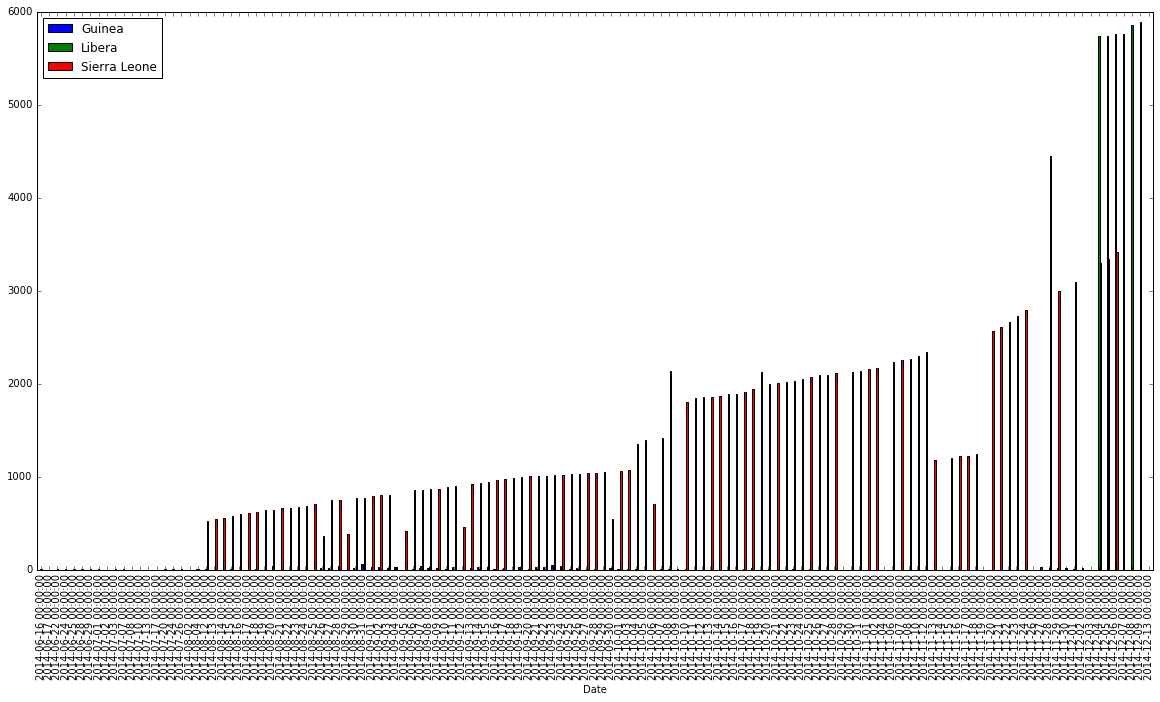

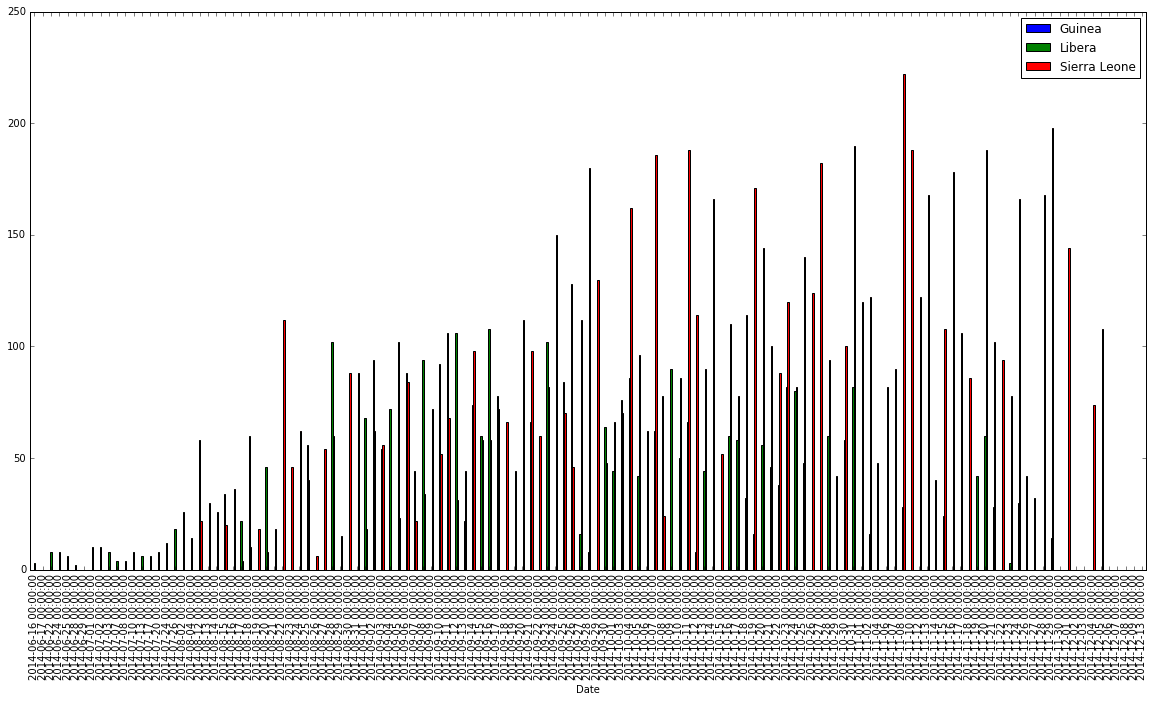

In [22]:
# Treating data for Guinea
guinea_data_daily = guinea_data[guinea_data['Description'].isin(['Newly deaths registered']) |
                                  guinea_data['Description'].isin(['New cases of confirmed'])].sort_values('Description')
guinea_data_daily['Date'] = pd.to_datetime(guinea_data_daily['Date'])
guinea_data_daily.set_index(['Description', 'Date'], inplace=True)
guinea_data_daily_sum = guinea_data_daily.apply(pd.to_numeric, args=('coerce',)).sum(axis=1).dropna()
guinea_data_daily_sum.index.set_levels(['New cases', 'New deaths', 'New deaths', 'New deaths'], level=0, inplace=True)

# Treating data for Libera
liberia_data_daily = liberia_data[liberia_data['Variable'].isin(['Newly reported deaths']) |
                                  liberia_data['Variable'].isin(['New case/s (confirmed)'])].sort_values('Variable')
liberia_data_daily['Date'] = pd.to_datetime(liberia_data_daily['Date'])
liberia_data_daily.set_index(['Variable', 'Date'], inplace=True)
liberia_data_daily_sum = liberia_data_daily.apply(pd.to_numeric, args=('coerce',)).sum(axis=1).dropna()
liberia_data_daily_sum.index.set_levels(['New cases','New deaths'], level=0, inplace=True)
liberia_data_daily_sum.index.levels[0].name = 'Description'

# Treating data for Sierra Leone
sl_data_daily = sl_data[sl_data['variable'].isin(['death_confirmed']) |
                                  sl_data['variable'].isin(['new_confirmed'])].sort_values('variable')
sl_data_daily['date'] = pd.to_datetime(sl_data_daily['date'])
sl_data_daily.set_index(['variable', 'date'], inplace=True)
sl_data_daily_sum = sl_data_daily.apply(pd.to_numeric, args=('coerce',)).sum(axis=1).dropna()
sl_data_daily_sum.index.set_levels(['New cases','New deaths'], level=0, inplace=True)
sl_data_daily_sum.index.levels[1].name = 'Date'
sl_data_daily_sum.index.levels[0].name = 'Description'

combined_data = pd.concat([guinea_data_daily_sum, liberia_data_daily_sum, sl_data_daily_sum], axis=1).sort_index().fillna(0)
combined_data.columns = ['Guinea', 'Libera', 'Sierra Leone']

import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

ax = combined_data.loc["New cases"].plot(kind="bar", figsize=(20, 10))
fig = ax.get_figure()
fig.savefig('New_cases.png')

ax = combined_data.loc["New deaths"].plot(kind="bar", figsize=(20, 10))
fig = ax.get_figure()
fig.savefig('Deads.png')

combined_data




### References

[Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) Wes McKinney